In [5]:
import pandas as pd

# Read in the data
# and join tables together

df = pd.read_csv('Products.txt', sep='\t', on_bad_lines='skip')
df.shape[1]


8

In [6]:
df_applications = pd.read_csv('Applications.txt', sep='\t', on_bad_lines='skip')

df_merged = pd.merge(df_applications, df, on='ApplNo', how='inner')
df_merged.shape[1]

11

In [7]:
# merge Products.txt and Submissions.txt

df2 = pd.read_csv('Submissions.txt', sep='\t', on_bad_lines='skip', encoding='latin-1')
df_merged_2 = pd.merge(df_merged, df2, how='inner', on='ApplNo')

df_merged_2.shape[1]

/var/folders/cr/k0_3w37j2bsg8sfcrrwtkymm0000gn/T/ipykernel_10113/1693986349.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('Submissions.txt', sep='\t', on_bad_lines='skip', encoding='latin-1')


18

In [8]:
df_application_docs = pd.read_csv('ApplicationDocs.txt', sep='\t', on_bad_lines='skip', encoding='latin-1')

df_merged_3 = pd.merge(df_merged_2, df_application_docs, how='inner', on='ApplNo')

In [9]:
df_submission_class_table = pd.read_csv('SubmissionClass_Lookup.txt', sep='\t', on_bad_lines='skip')

df_merged_4 = pd.merge(df_merged_3, df_submission_class_table, how='inner', on='SubmissionClassCodeID')

In [10]:
# drop columns that are not needed
df_merged_4.drop(['ApplNo', 'ApplType','SubmissionClassCodeID', 'ApplicationDocsID', 'ApplicationDocsTypeID', 'ApplicationDocsTitle', 'ApplicationDocsURL'], axis=1, inplace=True)

In [12]:
df_5 = pd.read_csv("Submissions.txt", sep='\t', on_bad_lines='skip', encoding='latin-1')
df_5['SubmissionStatus'].value_counts()

/var/folders/cr/k0_3w37j2bsg8sfcrrwtkymm0000gn/T/ipykernel_10113/2063498947.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5 = pd.read_csv("Submissions.txt", sep='\t', on_bad_lines='skip', encoding='latin-1')


AP    173162
TA      1040
Name: SubmissionStatus, dtype: int64

In [82]:
df_merged_4 = df_merged_4.drop(['SubmissionNo_x','SubmissionNo_y', 'ProductNo'], axis=1)

In [83]:
df_merged_4['SubmissionStatus'].value_counts()

AP    3833541
TA        488
Name: SubmissionStatus, dtype: int64

In [3]:
df_merged_4 = pd.read_csv('df_merged_4.csv', low_memory=False)
df_merged_4.shape[1]

8766

In [4]:
# how many nan vaues in each column
pd.set_option('display.max_columns', len(df_merged_4.columns))


df_merged_4 = df_merged_4.drop(['Unnamed: 0', 'ApplPublicNotes', 'SubmissionsPublicNotes'], axis=1)

df_merged_4['SubmissionStatus'].value_counts()


AP    67227
TA       23
Name: SubmissionStatus, dtype: int64

accuracy score: 1.0
f1 score: 1.0
recall score: 1.0
precision score: 1.0


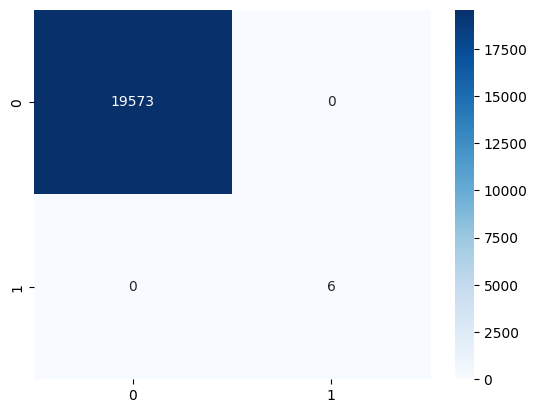

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# randomly select 500 records where SubmissionStatus is AP
df_submission_status_ap = df_merged_4[df_merged_4['SubmissionStatus'] == 'AP']
df_submission_status_ap = df_submission_status_ap.sample(n=1000, random_state=12345)

# select records where SubmissionStatus is not AP
df_submission_status_not_ap = df_merged_4[df_merged_4['SubmissionStatus'] != 'AP']

# concatenate the two dataframes
df_submission_status_ap = pd.concat([df_submission_status_ap, df_submission_status_not_ap])

# split data into train and test sets
train, test = train_test_split(df_submission_status_ap, test_size=0.3)

# separate the target from the predictors
train_y = train.SubmissionStatus
test_y = test.SubmissionStatus
train_x = train.drop(['SubmissionStatus'], axis=1)
test_x = test.drop(['SubmissionStatus'], axis=1)

# exclude non-numeric columns
train_x = train_x.select_dtypes(exclude=['object'])
test_x = test_x.select_dtypes(exclude=['object'])

# get rid of NaN values
train_x = train_x.dropna()
test_x = test_x.dropna()

# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=0)

# fit the classifier with the training data
clf.fit(train_x, train_y)

# make predictions on the test data
predictions = clf.predict(test_x)

# calculate the accuracy of the predictions with confusion matrix
cm = confusion_matrix(test_y, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

print('accuracy score: ' + str(accuracy_score(test_y, predictions)))
print('f1 score: ' + str(f1_score(test_y, predictions, average='macro', zero_division=0)))
print('recall score: ' + str(recall_score(test_y, predictions, average='macro', zero_division=0)))
print('precision score: ' + str(precision_score(test_y, predictions, average='macro', zero_division=0)))

In [100]:
# perform cross validation on decision tree classifier model
from sklearn.model_selection import cross_val_score
df_merged_4 = df_merged_4.dropna()

y = df_merged_4['SubmissionStatus']
X = df_merged_4.drop(['SubmissionStatus'], axis=1)

X = X.select_dtypes(exclude=['object'])

score = np.mean(cross_val_score(clf, X, y, cv=10))
print(score)

0.9983297649345577


[Text(0.5, 0.875, 'DrugName_IC-GREEN <= 0.5\ngini = 0.001\nsamples = 45683\nvalue = [45666, 17]\nclass = Accelerated Approval'),
 Text(0.25, 0.625, 'ActiveIngredient_DIMERCAPROL <= 0.5\ngini = 0.0\nsamples = 45606\nvalue = [45604, 2]\nclass = Accelerated Approval'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 45600\nvalue = [45600, 0]\nclass = Accelerated Approval'),
 Text(0.375, 0.375, 'SubmissionNo_x <= 9.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Accelerated Approval'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Accelerated Approval'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Tentative Approval'),
 Text(0.75, 0.625, 'SubmissionNo_x <= 23.0\ngini = 0.314\nsamples = 77\nvalue = [62, 15]\nclass = Accelerated Approval'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 62\nvalue = [62, 0]\nclass = Accelerated Approval'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Tentative Approval')]

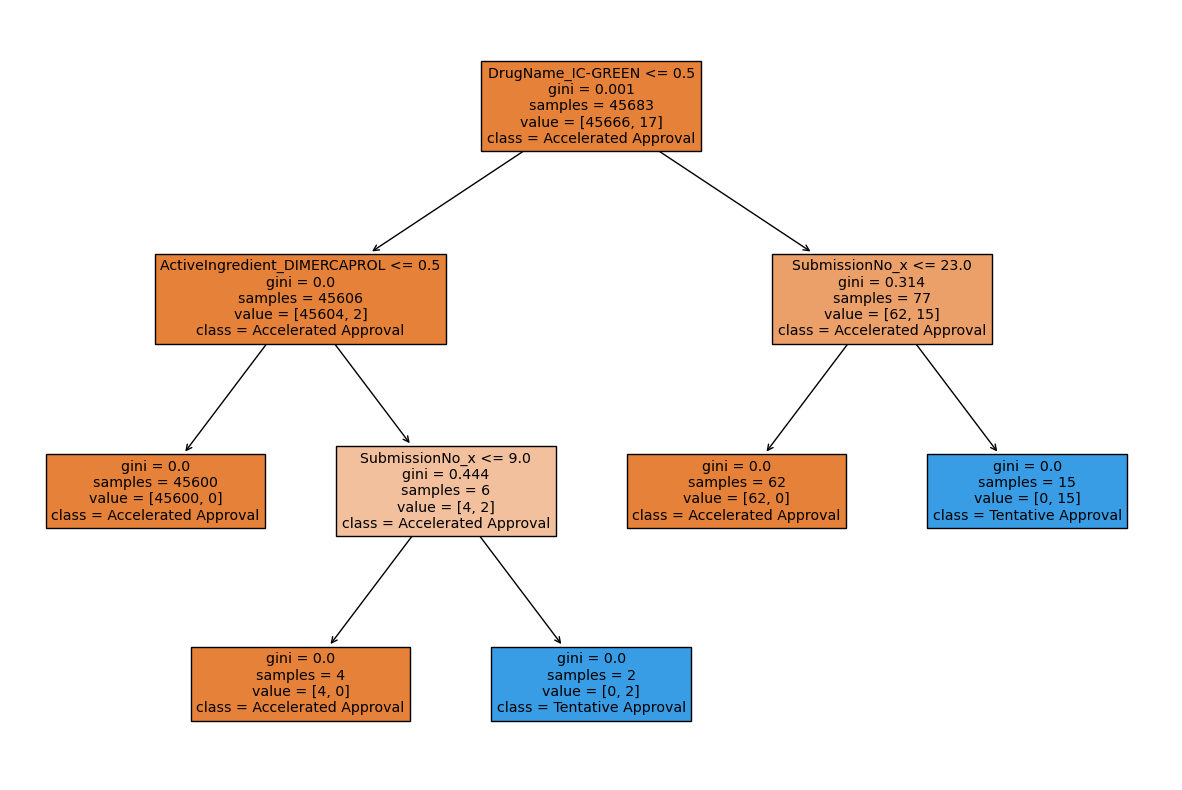

In [101]:
import sklearn.tree as tree

# output graphic of decision tree with column names
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=train_x.columns, class_names=['Accelerated Approval', 'Tentative Approval'], filled=True)